![Matplotlib](images/matplotlib_logo-s.png)

# Matplotlib

Let's take a quick look at the matplotlib essentials

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

---

![SciPy](images/scipy_logo.png)


In [23]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Data Fitting

Ejemplo típico de la función de bessel o a nua función conocida "randomizada"

## Integration 

In [24]:
import scipy.integrate as integrate

In [38]:
#help(integrate)

## Funcional ?

¿Crear una función integral (Bessel?) y plotearla? ¿o $e^x$ como sumatorio?

## Real life example: solar activity period

Adapted from [Python for scientific use, Part II: Data analysis](http://linuxgazette.net/115/andreasen.html) 
by Anders Andreasen. See also a more modern approach to the subject using [Pandas](http://pandas.pydata.org/),  the Python Data Analysis Library, on [this Josh Hemann notebook](http://nbviewer.ipython.org/gist/jhemann/4569783)

In the next example we will use the Fast Fourier Transform (FFT) in order to transform time-dependent data into the frequency domain. By doing so, it is possible to analyse if any predominant frequencies exists - i.e. if there is any periodicity in the data. 

The example data we will use is the sunspot activity measurements from year 1700 to year 2004 provided by National Geophysical Data Center - NOAA Sattelite and Information Service. The data set is the yearly sunspot observations available via FTP. The datafile is also included as sunspots.dat. The sunspot data have been used for illustrating the power of FFT with respect to finding a periodicity in sunspot activity in various computer languages, e.g. Matlab and BASIC. 





### Retrieve data

Solar spot data are available online from the [datafiles section](http://www.sidc.be/silso/datafiles) of the Sunspot index and Long-term Solar Observation webpage. We will use the yearly mean total sunspot number [plain text version.]( versionhttp://www.sidc.be/silso/DATA/SN_y_tot_V2.0.txt)

A quick web search point us to the `urllib` python module and to a very simple retrival procedure.

In [26]:
import urllib
url = "http://www.sidc.be/silso/DATA/SN_y_tot_V2.0.txt"
raw_data = urllib.request.urlopen(url)
solarspots = np.loadtxt(raw_data)

In [27]:
solarspots
years = solarspots[:,0]
spots = solarspots[:,1]

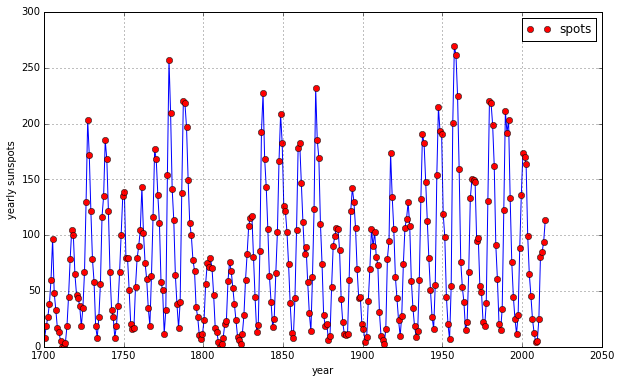

In [28]:
plt.figure(figsize=(10,6))

plt.plot(years, spots)
plt.plot(years, spots, "ro", label="spots" )

plt.xlabel("year")
plt.ylabel("yearly sunspots")
plt.legend()
plt.grid()

#plt.savefig("yearly_sunsports.png", dpi=300)

### FFT

Let's take a look at the [SciPy Fast Fourier Transform module manual](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html), and straight from there...


In [29]:
from scipy.fftpack import fft, fftfreq

In [30]:
spots_fft = fft(spots)

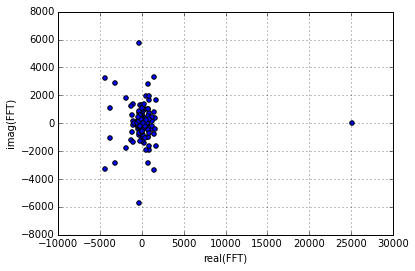

In [31]:
plt.scatter(spots_fft.real, spots_fft.imag)

plt.xlabel("real(FFT)")
plt.ylabel("imag(FFT)")
plt.grid()

And the power spectra in the frequency space

In [32]:
N = spots_fft.size
timestep = 1 # year
freq = fftfreq(N, d=timestep)   # 1/year
power = 2.0/N * np.abs(spots_fft)

freq = freq[1:N/2]
power = power[1:N/2]

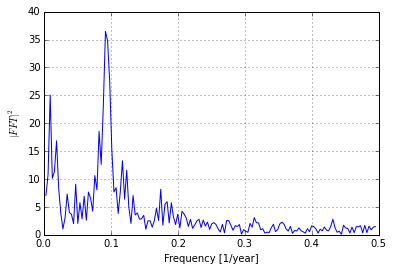

In [33]:
plt.plot(freq, power)

plt.xlabel("Frequency [1/year]")
plt.ylabel(r"$|FFT|^2$")
plt.grid()

Which in years becomes

In [34]:
period = 1./freq

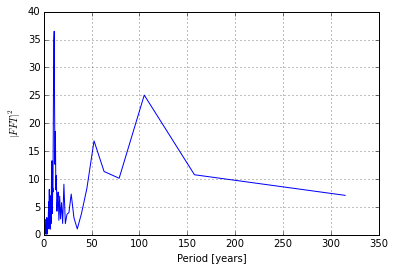

In [35]:
plt.plot(period, power)

plt.xlabel("Period [years]")
plt.ylabel(r"$|FFT|^2$")
plt.grid()

#plt.xlim( (0,30) )

### Solar spots period

In [36]:
max_power_index = np.argmax(power)
max_power_period = period[max_power_index]
print ('Maximum solar spots period is %1.1f years' %(max_power_period) )

Maximum solar spots period is 10.9 years


# References

Check https://github.com/ellisonbg/ds4e/tree/master/Content/Algorithms